Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected
samples per second
68.9876530810405


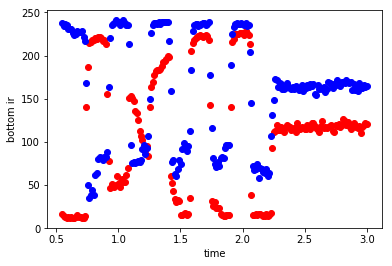

In [7]:
from zumi.zumi import Zumi
from zumi.util.screen import Screen
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

#this program just plots the front IR sensor readings

#take 5 seconds of samples
time_out =3
zumi.MIN_I2C_DELAY = 0
zumi = Zumi()
#zumi.mpu.calibrate_MPU(100)

#create list for the readings to be graphed
time_list = []
r_bott_list = []
l_bott_list = []

r_front_list = []
l_front_list = []

r_back_list = []
l_back_list = []

time_passed = 0
init_time = time.time()


zumi.play_note(100)
zumi.control_motors(20,40)
while(time_passed <= time_out):
    #zumi.go_straight(20,0)
    ir_readings = zumi.get_all_IR_data()
    
    bottom_right_ir = ir_readings[1]
    bottom_left_ir = ir_readings[3]
    
    front_right_ir = ir_readings[0]
    front_left_ir = ir_readings[5]
    
    back_right_ir = ir_readings[2]
    back_left_ir = ir_readings[4]
     
    time_passed = time.time()-init_time
    
    #add data to lists
    time_list.append(time_passed)
    
    r_bott_list.append(bottom_right_ir)
    l_bott_list.append(bottom_left_ir)
    
    r_front_list.append(front_right_ir)
    l_front_list.append(front_left_ir)
    
    r_back_list.append(back_right_ir)
    l_back_list.append(back_left_ir)
zumi.stop()
zumi.play_note(100)
print("samples per second")
print(len(time_list)/time_passed)

plt.plot(time_list,l_bott_list,'ro',time_list,r_bott_list,'bo')
plt.ylabel('bottom ir')
plt.xlabel('time')
plt.show()

# plt.plot(time_list,l_front_list,'go',time_list,r_front_list,'ro')
# plt.ylabel('front ir')
# plt.xlabel('time')
# plt.show()

# plt.plot(time_list,l_back_list,'go',time_list,r_back_list,'ro')
# plt.ylabel('back ir')
# plt.xlabel('time')
# plt.show()

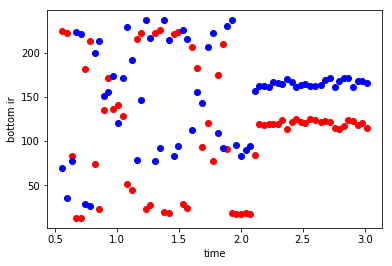

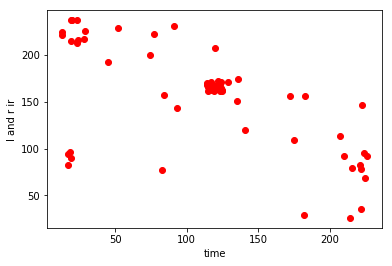

In [2]:
plt.plot(time_list,l_bott_list,'ro',time_list,r_bott_list,'bo')
plt.ylabel('bottom ir')
plt.xlabel('time')
plt.show()

plt.plot(l_bott_list,r_bott_list,'ro')
plt.ylabel('l and r ir')
plt.xlabel('time')
plt.show()

In [88]:
maxleft = max(l_bott_list)
maxright = max(r_bott_list)

minleft = min(l_bott_list)
minright = min(r_bott_list)

change_left = maxleft - minleft
change_right = maxright - minright

print("min left ",minleft)
print("min right ",minright)

print("max left ",maxleft)
print("max right ",maxright)

print(change_left)
print(change_right)

min left  31
min right  73
max left  217
max right  224
186
151


93


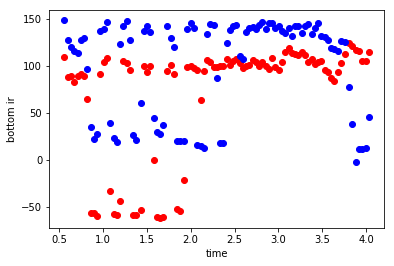

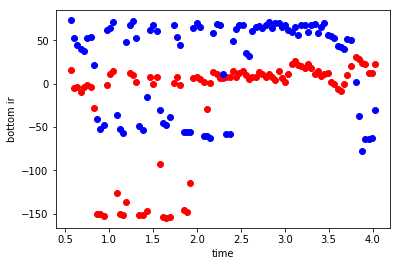

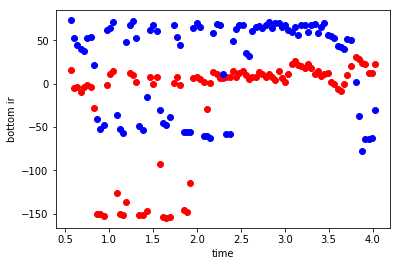

In [90]:
length = len(l_bott_list)
print(length)
nl_bott_list = l_bott_list
nr_bott_list = r_bott_list

plt.plot(time_list,l_bott_list,'ro',time_list,r_bott_list,'bo')
plt.ylabel('bottom ir')
plt.xlabel('time')
plt.show()

for i in range(length):
    nl_bott_list[i] = nl_bott_list[i] - change_left/2
    nr_bott_list[i] = nr_bott_list[i] - change_right/2
    
plt.plot(time_list,l_bott_list,'ro',time_list,r_bott_list,'bo')
plt.ylabel('bottom ir')
plt.xlabel('time')
plt.show()

plt.plot(time_list,nl_bott_list,'ro',time_list,nr_bott_list,'bo')
plt.ylabel('bottom ir')
plt.xlabel('time')
plt.show()

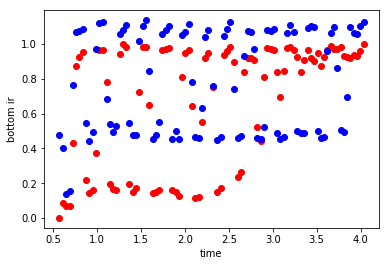

In [66]:
plt.plot(time_list,nl_bott_list,'ro',time_list,nr_bott_list,'bo')
plt.ylabel('bottom ir')
plt.xlabel('time')
plt.show()